In [16]:
# Step 1: Import necessary libraries
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pralabhpoudel/world-energy-consumption")

print("Path to dataset files:", path)

100%|██████████| 2.25M/2.25M [00:02<00:00, 934kB/s]

Extracting files...
Path to dataset files: /home/sana/.cache/kagglehub/datasets/pralabhpoudel/world-energy-consumption/versions/3


In [31]:
import os
directory_path = '/home/sana/.cache/kagglehub/datasets/pralabhpoudel/world-energy-consumption/versions/3'
files = os.listdir(directory_path)
print(files)


['World Energy Consumption.csv']


In [33]:
data_path = '/home/sana/.cache/kagglehub/datasets/pralabhpoudel/world-energy-consumption/versions/3/World Energy Consumption.csv'
data = pd.read_csv(data_path)
print(data.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)


In [34]:
data.isnull().sum()


country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['gdp', 'population', 'biofuel_consumption']])  # Example columns to scale


In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['country', 'iso_code']])


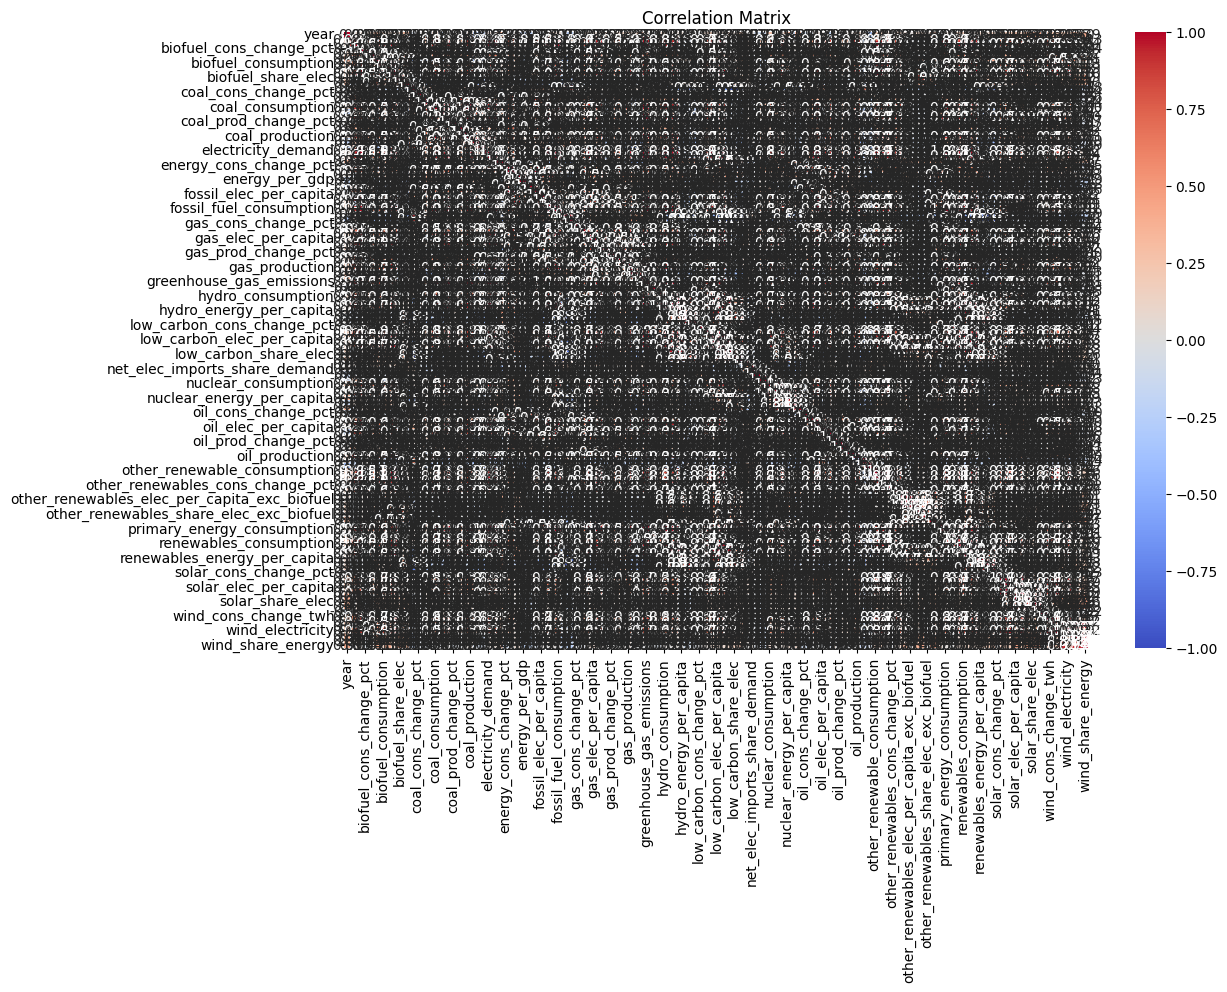

In [39]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [41]:
data = data.drop(columns=['iso_code'])  # Drop columns with too many missing values


In [42]:
data['gdp'] = data['gdp'].fillna(data['gdp'].median())
data['population'] = data['population'].fillna(data['population'].mean())


In [44]:
data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill


/tmp/ipykernel_12783/992769330.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill
/tmp/ipykernel_12783/992769330.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill


In [45]:
data.isnull().sum()  # Check again for missing values


country                    0
year                       0
population                 0
gdp                        0
biofuel_cons_change_pct    0
                          ..
wind_elec_per_capita       0
wind_electricity           0
wind_energy_per_capita     0
wind_share_elec            0
wind_share_energy          0
Length: 128, dtype: int64

In [52]:
# Features (population) and target (biofuel_consumption)
X = data[['population']]
y = data['biofuel_consumption']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression  
# Initialize the model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


# Output the evaluation metrics
print("Mean Squared Error:", mse)

# Now you can predict biofuel consumption for a given population
population_input = int(input())  # Example population
predicted_consumption = model.predict([[population_input]])
print(f"Predicted Biofuel Consumption for population {population_input}: {predicted_consumption[0]} TWh")

Mean Squared Error: 51398.64115599481
Predicted Biofuel Consumption for population 100000: 88.1970215537646 TWh


/home/sana/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
